### how to handle imbalanced datasets?

In [ ]:
import pandas as pd
import sqlite3
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## TO DO:

# opschonenen kijken of het allemaal klopt?
# vershillende imlearn technieken gebruikne
# nieuwe statische data toeveogen / descriptives
# nieuwe dynamische data toevoegen / descriptives

In [3]:
# https://data.overheid.nl/dataset/zorginstellingen-gemeente-utrecht

#### get data OLD

In [ ]:
# https://www.sqlitetutorial.net/sqlite-python/sqlite-python-select/

In [101]:
def get_headers(database_path, table):
    con = sqlite3.connect(database_path)
    cursor = con.cursor()
    cursor.execute(f"SELECT * FROM {table};")
    colnames = cursor.description
    headers = []
    print('getting headers..')
    for row in colnames:
        headers.append(row[0])
    return cursor,headers

# headers = get_headers('data/soccer_database.sqlite', 'Match')

In [109]:
def get_data(database_path, table):
    cursor, headers = get_headers(database_path, table)
    print('creating table..')
    rows = cursor.fetchall()
    row_list = []
    for row in rows:
        row_list.append(row)
    # print(row_list[0])
    df_rows = pd.DataFrame(row_list)
    df_rows.columns = headers
    return df_rows

In [110]:
# df = get_data('data/database.sqlite', 'Match')
# df.head()

getting headers..
creating table..


In [112]:
# or us a pandas function to select data from sqlite
# with sqlite3.connect("data/database.sqlite") as connect:
#     match = pd.read_sql_query("SELECT * from Match", connect)
#     country = pd.read_sql_query("SELECT * from Country", connect)
#     league = pd.read_sql_query("SELECT * from League", connect)
#     team =pd.read_sql_query("SELECT * from Team", connect)
#     player =pd.read_sql_query("SELECT * from Player", connect)
#     player_attributes=pd.read_sql_query("SELECT * from  Player_Attributes", connect)

#### get data NEW

In [249]:
import requests
# https://github.com/openfootball/football.json
# https://openfootball.github.io/

In [125]:
r = requests.get('https://raw.githubusercontent.com/openfootball/worldcup.json/master/2018/worldcup.json')

In [139]:
json = r.json()
df = pd.DataFrame(json)
# json

In [163]:
rounds = pd.json_normalize(json['rounds'])

In [168]:
matches = pd.json_normalize(rounds['matches'])

In [174]:
df_list = []
for column in matches:
    df_list.append(pd.json_normalize(matches[column]))

In [176]:
df_matches = pd.concat(df_list)

In [187]:
df_matches.columns

Index(['num', 'date', 'time', 'score1', 'score2', 'score1i', 'score2i',
       'goals1', 'goals2', 'group', 'city', 'timezone', 'team1.name',
       'team1.code', 'team2.name', 'team2.code', 'stadium.key', 'stadium.name',
       'score1et', 'score2et', 'score1p', 'score2p', 'knockout'],
      dtype='object')

In [188]:
df_selectie = df_matches[['num', 'date' , 'time', 'group', 'city', 'timezone', 'team1.code', 'team2.code']]

In [190]:
df_selectie.head()

,num,date,time,group,city,timezone,team1.code,team2.code
0,1.0,2018-06-14,18:00,Group A,Moscow,UTC+3,RUS,KSA
1,2.0,2018-06-15,17:00,Group A,Ekaterinburg,UTC+5,EGY,URU
2,5.0,2018-06-16,13:00,Group C,Kazan,UTC+3,FRA,AUS
3,9.0,2018-06-17,21:00,Group E,Rostov-on-Don,UTC+3,BRA,SUI
4,12.0,2018-06-18,15:00,Group F,Nizhny Novgorod,UTC+3,SWE,KOR


In [194]:
df_goals = pd.DataFrame()
df_goals['match_num'] = df_matches['num']

In [217]:
goals = pd.json_normalize(df_matches['goals1'])
goals['match_num'] = df_matches['num'].values
goals.head()

,0,1,2,3,4,5,match_num
0,"{'name': 'Gazinsky', 'minute': 12, 'score1': 1...","{'name': 'Cheryshev', 'minute': 43, 'score1': ...","{'name': 'Dzyuba', 'minute': 71, 'score1': 3, ...","{'name': 'Cheryshev', 'minute': 90, 'offset': ...","{'name': 'Golovin', 'minute': 90, 'offset': 4,...",None,1.0
1,None,None,None,None,None,None,2.0
2,"{'name': 'Griezmann', 'minute': 58, 'score1': ...","{'name': 'Behich', 'minute': 81, 'score1': 2, ...",None,None,None,None,5.0
3,"{'name': 'Coutinho', 'minute': 20, 'score1': 1...",None,None,None,None,None,9.0
4,"{'name': 'Granqvist', 'minute': 65, 'score1': ...",None,None,None,None,None,12.0


In [222]:
goal_columns = goals.columns.to_list()

In [244]:
# goals = pd.json_normalize(df_matches['goals1'])
goals_list = []
for column in goals:
    if column != 'match_num':
        print(f'add {column}')
        df_goal = pd.json_normalize(goals[column])
        df_goal['match_num'] = goals['match_num']
        goals_list.append(df_goal)

add 0
add 1
add 2
add 3
add 4
add 5


In [247]:
for item in goals_list:
    print(item)
    break

           name  minute  score1  score2 penalty owngoal  offset  match_num
0      Gazinsky    12.0     1.0     0.0     NaN     NaN     NaN        1.0
1           NaN     NaN     NaN     NaN     NaN     NaN     NaN        2.0
2     Griezmann    58.0     1.0     0.0    True     NaN     NaN        5.0
3      Coutinho    20.0     1.0     0.0     NaN     NaN     NaN        9.0
4     Granqvist    65.0     1.0     0.0    True     NaN     NaN       12.0
..          ...     ...     ...     ...     ...     ...     ...        ...
155  Yerry Mina    90.0     1.0     1.0     NaN     NaN     3.0       56.0
156         NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN
157         NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN
158         NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN
159         NaN     NaN     NaN     NaN     NaN     NaN     NaN        NaN

[160 rows x 8 columns]


#### get data NEW-statsbomb + exploration

In [616]:
from statsbombpy import sb

In [617]:
# selecteren van de dataset van de verschillende matches

In [618]:
matches = sb.matches(competition_id=55, season_id=43)
match_ids = matches['match_id'].unique()
total_events = []

for uniek_id in match_ids:
    events =sb.events(match_id=uniek_id)
    total_events.append(events)

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)
/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data

In [656]:
events_all_matches = pd.concat(total_events)
events_all_matches.head()
events_all_matches['uniekid'] = (events_all_matches['match_id'] * 1000) + events_all_matches['possession_team_id']

/var/folders/1r/tdmn3kx53dxffhrmfbsld_4w0000gn/T/ipykernel_56889/3204614140.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  events_all_matches['uniekid'] = (events_all_matches['match_id'] * 1000) + events_all_matches['possession_team_id']


In [620]:
# events = events_all_matches

#### data exploration

In [532]:
# for i in np.arange(0,30):
#     print(len(total_events[i].columns))

In [510]:
# comp = sb.competitions()
# comp.loc[comp['competition_gender'] == 'male'].head()

In [511]:
# comp.loc[comp['competition_name'] == "UEFA Euro"]

In [563]:
# nederland_match = matches.loc[matches['match_id'] ==3788756]

In [542]:
# events =sb.events(match_id=3788756)
# events.tail()

In [160]:
## voorspellen van goal met statische kenmerken, dynamische kenmerken, en twitter?

<AxesSubplot:ylabel='Frequency'>

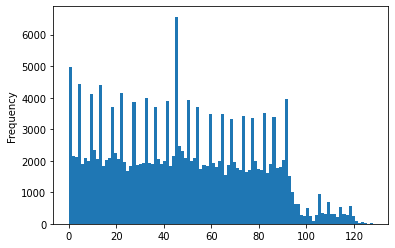

In [564]:
events['minute'].plot(kind='hist', bins=100)

In [565]:
timing = events[['duration','minute','period', 'second', 'timestamp']]
timing.loc[timing['minute'] == 90].head(10)

,duration,minute,period,second,timestamp
995,2.169668,90,2,54,00:45:54.267
996,3.134026,90,2,58,00:45:58.162
2002,NaN,90,2,56,00:45:56.437
2961,0.000000,90,2,56,00:45:56.437
3303,0.429643,90,2,57,00:45:57.921
3683,0.000000,90,2,56,00:45:56.437
3798,0.000000,90,2,40,00:45:40.058
992,1.038824,90,2,0,00:45:00.937
993,0.773582,90,2,2,00:45:02.539
994,5.293772,90,2,4,00:45:04.642


In [567]:
# events.loc[events['minute'] == 1].head()

In [568]:
import SoccermaticsForPython.FCPython as sfp_fcp
import SoccermaticsForPython as sfp

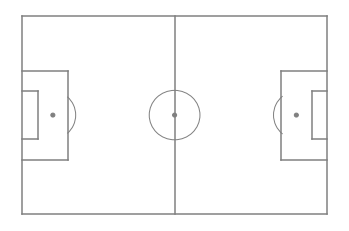

In [569]:
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

In [579]:
events['match_id'].unique

<bound method Series.unique of 0       3788753
1       3788753
2       3788753
3       3788753
4       3788753
         ...   
2992    3788744
2993    3788744
2994    3788744
2995    3788744
2996    3788744
Name: match_id, Length: 192695, dtype: int64>

In [570]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#ID for England vs Sweden Womens World Cup
match_id_required = 69301
home_team_required ="Netherlands"
away_team_required ="Austria"

In [574]:
# xgoal = shots.loc[(shots['shot_outcome'] == 'Goal') & (shots['player'] == 'Memphis Depay'), 'location'][0][0]
# ygoal = shots.loc[(shots['shot_outcome'] == 'Goal') & (shots['player'] == 'Memphis Depay'), 'location'][0][1]

# xgoal, ygoal

RuntimeError: Can not put single artist in more than one figure

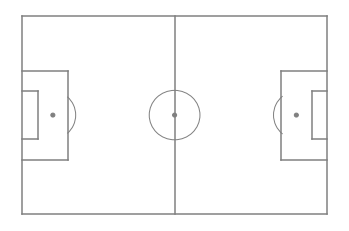

In [573]:
#Draw the pitch
import SoccermaticsForPython.FCPython as sfp_fcp
import SoccermaticsForPython as sfp
from SoccermaticsForPython.FCPython import createPitch

shots = events.loc[events['type'] == 'Shot'].set_index('id')
shots.head()

(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome']=='Goal'
    team_name=shot['team']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
# fig.savefig('Output/shots.pdf', dpi=100) 
plt.show()


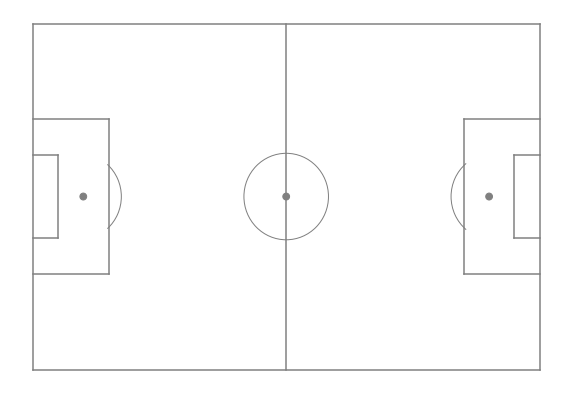

In [552]:
#Find the passes
passes = events.loc[events['type'] == 'Pass'].set_index('id')

#Draw the pitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    #if thepass['team_name']==away_team_required: #
    if thepass['player']=='Memphis Depay':
        x=thepass['location'][0]
        y=thepass['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y

        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=2,color="blue")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)
# fig.savefig('Output/passes.pdf', dpi=100) 
plt.show()


In [553]:
passes['location']

Series([], Name: location, dtype: object)

In [554]:
events['player'].value_counts()

Series([], Name: player, dtype: int64)

In [555]:
len(events)

5

<AxesSubplot:>

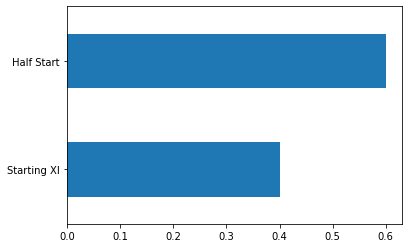

In [556]:
events['type'].value_counts(normalize=True, ascending=True).plot(kind='barh')

In [175]:
events['minute'].value_counts()

30    90
45    88
56    80
0     78
25    78
      ..
27    10
66     5
63     3
89     2
10     2
Name: minute, Length: 93, dtype: int64

In [31]:
events.columns.to_list()

['50_50',
 'ball_receipt_outcome',
 'ball_recovery_recovery_failure',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_offensive',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_position',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id',
 'index',
 'interception_outcome',
 'location',
 'match_id',
 'minute',
 'miscontrol_aerial_won',
 'off_camera',
 'out',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_length',
 'pass_miscommunication',
 'pass_no_t

In [176]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
print('min timestamp:', min(events['timestamp']), 'max timestamp: ', max(events['timestamp']))

min timestamp: 2022-04-01 00:00:00 max timestamp:  2022-04-01 00:49:31.447000


#### yvar

In [314]:
## voorspellen van de kans dat het home team gaat scoren in de volgende minuut

In [621]:
events_all_matches['shot_outcome'].value_counts()

Off T               416
Blocked             337
Saved               283
Goal                155
Wayward              56
Post                 31
Saved Off Target      6
Saved to Post         5
Name: shot_outcome, dtype: int64

In [698]:
events_all_matches.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure,bad_behaviour_card,injury_stoppage_in_chain,pass_deflected,pass_inswinging,shot_one_on_one,block_deflection,block_save_block,foul_committed_penalty,foul_won_penalty,shot_deflected,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,player_off_permanent,shot_saved_off_target,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_to_post,shot_open_goal,shot_saved_to_post,dribble_no_touch,block_offensive,ball_recovery_offensive,shot_follows_dribble,shot_redirect,goalkeeper_lost_in_play,goalkeeper_success_in_play,uniekid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9427b18a-6b10-411f-90da-3d6240b80c71,1,NaN,NaN,3788753,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Finland,1835,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",Finland,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3788754835
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542c58bf-5c6c-43ca-9d8d-e086c7f08aaf,2,NaN,NaN,3788753,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Finland,1835,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",Russia,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3788754835
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0dfe8a0-a0b9-443e-89e3-a8ba6596fa33,3,NaN,NaN,3788753,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Finland,1835,[c7156352-f4b7-4140-aa51-6e26fd019a11],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finland,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3788754835
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c7156352-f4b7-4140-aa51-6e26fd019a11,4,NaN,NaN,3788753,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Finland,1835,[a0dfe8a0-a0b9-443e-89e3-a8ba6596fa33],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [701]:
events_all_matches['uniekid'].nunique()

102

In [699]:
yvar_goals = events_all_matches.loc[events_all_matches['shot_outcome'] == 'Goal'].reset_index()
yvar_goals['goal'] = 1
yvar_goals['y_minute'] = yvar_goals['minute']
yvar_goals['peil_minute'] = yvar_goals['minute'] - 1
df_goals = yvar_goals[['uniekid', 'peil_minute', 'y_minute', 'goal']]

In [702]:
df_goals['uniekid'].nunique()

75

In [700]:
df_goals.head()

,uniekid,peil_minute,y_minute,goal
0,3788753796,45,46,1
1,3788765773,4,5,1
2,3788765773,24,25,1
3,3788765909,60,61,1
4,3788765773,66,67,1


In [724]:
def get_minutes_no_goals(events, df_goals, uniek_id_list):
    yvar_no_goals_total = []
    for uniekid in uniek_id_list:
        events_per_match = events_all_matches.loc[events_all_matches['uniekid'] == uniekid]
        last_minute_game = max(events_per_match['minute'])
        yvar_no_goals = pd.DataFrame(np.arange(1, last_minute_game))
        yvar_no_goals = yvar_no_goals.rename(columns={0: "minute"})
        goals = df_goals.loc[df_goals['uniekid'] == uniekid]
        goals_minutes = goals['y_minute'].unique()
        yvar_no_goals = yvar_no_goals.loc[~yvar_no_goals['minute'].isin(goals_minutes)]
        yvar_no_goals['goal'] = 0
        yvar_no_goals['y_minute'] = yvar_no_goals['minute']
        yvar_no_goals['peil_minute'] = yvar_no_goals['minute'] - 1
        yvar_no_goals['uniekid'] = uniekid
        yvar_no_goals = yvar_no_goals[['uniekid','peil_minute', 'y_minute', 'goal']]
        yvar_no_goals_total.append(yvar_no_goals)
    return pd.concat(yvar_no_goals_total)

In [749]:
uniek_id_list = events_all_matches['uniekid'].unique()
yvar_no_goals = get_minutes_no_goals(events,df_goals, uniek_id_list)
# [['uniekid', 'peil_minute', 'y_minute', 'goal']]
yvar_no_goals.tail()

,uniekid,peil_minute,y_minute,goal
88,3788744773,88,89,0
89,3788744773,89,90,0
90,3788744773,90,91,0
91,3788744773,91,92,0
92,3788744773,92,93,0


In [750]:
yvar = pd.concat([df_goals,yvar_no_goals])

In [751]:
yvar['goal'].value_counts(normalize=True)

0    0.9844
1    0.0156
Name: goal, dtype: float64

In [752]:
yvar.head()

,uniekid,peil_minute,y_minute,goal
0,3788753796,45,46,1
1,3788765773,4,5,1
2,3788765773,24,25,1
3,3788765909,60,61,1
4,3788765773,66,67,1


#### xvar

In [753]:
# https://github.com/statsbomb/open-data/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf

In [754]:
events.head()

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_no_touch,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49732f3b-3fae-4f17-802a-b831eb3b3fe5,1,NaN,NaN,NaN,3788744,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Wales,907,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Wales,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0017bc7c-464e-4806-903c-024341a97dab,2,NaN,NaN,NaN,3788744,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Wales,907,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3412, 'lineup': [{'player': {'id...",Switzerland,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1b95596-bf12-43b1-8cd3-ceedb824dae4,3,NaN,NaN,NaN,3788744,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Wales,907,[369eccc5-42a7-403d-9227-1554b7ff23c6],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wales,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369eccc5-42a7-403d-9227-1554b7ff23c6,4,NaN,NaN,NaN,3788744,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Wales,907,[a1b95596-bf12-43b1-8cd3-ceedb824dae4],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a6f5dbab-5529-47a7-a8fd-abb473081e8e,1586,NaN,NaN,NaN,3788744,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,76,Switzerland,773,[bddda7ff-7f90-4766-bd66-7027a2cec705],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland,00:00:00.000,Half Start,NaN


In [ ]:
# position = name of the position the play was in in the moment of the play
# location = van links naar rechts, dus hoger is de aanval
# under_pressure = action was done under pressure

In [825]:
def get_events_per_id(events_all_matches, uniek_id_list):
    events_all_matches_select = []
    for uniekid in uniek_id_list:
        events_per_match = events_all_matches.loc[events_all_matches['uniekid'] == uniekid]
        events_per_match_select = events_per_match.loc[events_per_match['minute'] >= 1]   #remove starting positions in events
        events_per_match_select = events_per_match_select[['uniekid', 'minute','second', 'location', 'position', 'play_pattern', 'type','under_pressure']]
        events_per_match_select = events_per_match_select.loc[~events_per_match_select['location'].isnull()]       # drop substitues
        events_to_drop = ['Half Start', 'Half End']
        events_per_match_select = events_per_match_select.loc[~events_per_match_select['type'].isin(events_to_drop)]
        events_all_matches_select.append(events_per_match_select)
    return pd.concat(events_all_matches_select)        

In [826]:
len(uniek_id_list)

102

In [827]:
events_all_matches_select = get_events_per_id(events_all_matches, uniek_id_list)
events_all_matches_select.head()

,uniekid,minute,second,location,position,play_pattern,type,under_pressure
81,3788754835,6,39,"[28.3, 61.4]",Right Center Midfield,Regular Play,Pass,True
82,3788754835,6,40,"[35.6, 42.7]",Left Center Midfield,Regular Play,Pass,NaN
83,3788754835,6,42,"[22.5, 47.7]",Center Back,Regular Play,Pass,NaN
84,3788754835,6,46,"[26.8, 22.5]",Left Center Back,Regular Play,Pass,NaN
85,3788754835,6,48,"[28.5, 4.4]",Left Wing Back,Regular Play,Pass,NaN


In [828]:
events_all_matches_select['uniekid'].nunique()

102

In [770]:
# clean_events.head()

In [609]:
# feature engineering

In [829]:
def events_feature_engineering(events_all_matches_select):
    location_x = []
    location_y = []

    for k,v in events_all_matches_select.iterrows():
        x = v['location'][0]
        y = v['location'][1]
        location_x.append(x)
        location_y.append(y)

    events_all_matches_select['location_x'] = location_x
    events_all_matches_select['location_y'] = location_y
    events_all_matches_clean = events_all_matches_select.drop('location', axis =1)
    events_all_matches_clean.loc[events_all_matches_clean['location_x'] >= 60, 'aanvallende_helft'] = 1
    events_all_matches_clean.loc[events_all_matches_clean['location_x'] < 60, 'aanvallende_helft'] = 0
    events_all_matches_clean.loc[events_all_matches_clean['location_x'] >= 90, 'aanvallend_kwart'] = 1
    events_all_matches_clean.loc[events_all_matches_clean['location_x'] < 90, 'aanvallend_kwart'] = 0
    events_all_matches_clean['in_de_16'] = 0
    events_all_matches_clean.loc[(events_all_matches_clean['location_x'] >= 102.62) & (events_all_matches_clean['location_y'] >= 18) & (events_all_matches_clean['location_y'] <= 62), 'in_de_16'] = 1
    events_all_matches_clean.loc[events_all_matches_clean['under_pressure'] == True, 'under_pressure'] = 1
    events_all_matches_clean.loc[events_all_matches_clean['under_pressure'] != 1, 'under_pressure'] = 0
    events_all_matches_clean = events_all_matches_clean.drop('location_x', axis =1)
    events_all_matches_clean = events_all_matches_clean.drop('location_y', axis =1)
    return events_all_matches_clean

In [875]:
events_all_matches_clean = events_feature_engineering(events_all_matches_select)
events_all_matches_clean.head()

,uniekid,minute,second,position,play_pattern,type,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16
81,3788754835,6,39,Right Center Midfield,Regular Play,Pass,1,0.0,0.0,0
82,3788754835,6,40,Left Center Midfield,Regular Play,Pass,0,0.0,0.0,0
83,3788754835,6,42,Center Back,Regular Play,Pass,0,0.0,0.0,0
84,3788754835,6,46,Left Center Back,Regular Play,Pass,0,0.0,0.0,0
85,3788754835,6,48,Left Wing Back,Regular Play,Pass,0,0.0,0.0,0


In [876]:
events_all_matches_clean.set_index(['uniekid', 'minute', 'second'])

position    play_pattern  \
uniekid    minute second                                              
3788754835 6      39          Right Center Midfield    Regular Play   
                  40           Left Center Midfield    Regular Play   
                  42                    Center Back    Regular Play   
                  46               Left Center Back    Regular Play   
                  48                 Left Wing Back    Regular Play   
...                                             ...             ...   
3788744773 37     2                      Right Back     From Corner   
           46     18                 Center Forward    Regular Play   
           55     54          Right Center Midfield    Regular Play   
           79     15      Center Defensive Midfield  From Goal Kick   
           75     54                Right Wing Back   From Throw In   

                                   type under_pressure  aanvallende_helft  \
uniekid    minute second                                                    
3788754835 6      39               Pass              1                0.0   
                  40               Pass              0                0.0   
                  42               Pass              0                0.0   
                  46               Pass              0                0.0   
                  48               Pass              0                0.0   
...                                 ...            ...                ...   
3788744773 37     2       Dribbled Past              0                0.0   
           46     18      Dribbled Past              0                1.0   
           55     54      Dribbled Past              0                0.0   
           79     15      Dribbled Past              0                1.0   
           75     54             Shield              1                0.0   

                          aanvallend_kwart  in_de_16  
uniekid    minute second                              
3788754835 6      39                   0.0         0  
                  40                   0.0         0  
                  42                   0.0         0  
                  46                   0.0         0  
                  48                   0.0         0  
...                                    ...       ...  
3788744773 37     2                    0.0         0  
           46     18                   1.0         0  
           55     54                   0.0         0  
           79     15                   0.0         0  
           75     54                   0.0         0  

[188644 rows x 7 columns]

In [877]:
dummie_categories = ['position', 'play_pattern', 'type']
df_dummies = pd.get_dummies(events_all_matches_clean[dummie_categories])
# events_all_matches_clean =events_all_matches_clean.set_index(['uniekid', 'minute', 'second'])
events_all_matches_clean_dummies = events_all_matches_clean.join(df_dummies)
events_all_matches_clean = events_all_matches_clean.reset_index()
events_all_matches_clean_dummies = events_all_matches_clean_dummies.drop(dummie_categories,axis = 1).reset_index()
events_all_matches_clean_dummies.drop('index', axis=1,inplace=True)
events_all_matches_clean_dummies.head()

,index,uniekid,minute,second,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
0,11,3788771942,1,24,0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11,3788771942,1,24,0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,11,3788759768,1,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,11,3788759768,1,0,0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,12,3788771942,1,29,0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [880]:
events_all_matches_clean_dummies.head()

,uniekid,minute,second,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
0,3788771942,1,24,0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3788771942,1,24,0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3788759768,1,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3788759768,1,0,0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3788771942,1,29,0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [859]:
events_all_matches_clean_dummies['uniekid'].nunique()

102

In [834]:
# events_all_matches_clean_dummies.groupby(['uniekid','minute'])['under_pressure'].sum()

In [881]:
x_vars = events_all_matches_clean_dummies.drop(['minute', 'uniekid'], axis=1).columns.to_list()
total_sum = [] 

for column in x_vars:
    col_sum = events_all_matches_clean_dummies.groupby(['uniekid','minute'])[column].sum()
    total_sum.append(col_sum)

aggregated_xvar = pd.concat(total_sum, axis=1).reset_index()

In [865]:
# events_all_matches_clean.loc[
#     (events_all_matches_clean['uniekid'] == 3788741909) &
#     (events_all_matches_clean['minute'] == 1) ]

# events_all_matches_clean_dummies.loc[
#     (events_all_matches_clean_dummies['uniekid'] == 3788741909) &
#     (events_all_matches_clean_dummies['minute'] == 1) ]

In [882]:
aggregated_xvar.head()

,uniekid,minute,second,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
0,3788741909,1,9018,299,299.0,50.0,0,28,43,38,43,53,12,56.0,108.0,36,53.0,39,7,43,38,9,55.0,116.0,19,57.0,39,13,31,40,50,2,197.0,41.0,32,25,226.0,7,396.0,0,297.0,14,4,204.0,3,8,8,5,22,0,0,12,9,7,7,0,0,0,299.0,74.0,0,0,3
1,3788741909,2,4386,0,51.0,51.0,0,2,9,5,5,11,0,8.0,9.0,1,7.0,6,1,5,3,0,6.0,8.0,2,4.0,0,1,4,5,3,0,15.0,11.0,2,4,22.0,1,44.0,0,32.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.0,0.0,0,0,0
2,3788741909,3,14177,253,182.0,0.0,0,16,33,39,31,26,7,46.0,67.0,24,52.0,27,12,27,27,7,40.0,73.0,16,31.0,20,5,34,26,19,2,95.0,32.0,12,18,156.0,3,349.0,0,156.0,3,1,179.0,5,5,6,5,16,0,7,6,0,5,2,0,0,0,209.0,80.0,0,0,1
3,3788741909,5,20653,151,151.0,0.0,0,13,14,18,18,12,4,23.0,42.0,12,32.0,15,2,13,18,3,27.0,43.0,11,25.0,15,6,16,20,17,2,57.0,25.0,8,10,88.0,0,195.0,1,108.0,0,0,82.0,1,0,1,0,5,0,2,1,0,1,0,0,0,0,181.0,19.0,0,0,0
4,3788741909,6,1372,28,0.0,0.0,0,0,2,0,1,6,0,2.0,3.0,2,1.0,1,1,1,1,0,0.0,3.0,1,1.0,1,0,0,1,2,0,4.0,0.0,1,0,7.0,1,13.0,0,0.0,1,1,7.0,4,0,0,2,2,0,1,0,6,0,2,0,0,0,0.0,2.0,0,0,0


In [883]:
yvar.head()

,uniekid,peil_minute,y_minute,goal
0,3788753796,45,46,1
1,3788765773,4,5,1
2,3788765773,24,25,1
3,3788765909,60,61,1
4,3788765773,66,67,1


In [884]:
left_keys = ['uniekid', 'peil_minute']
right_keys = ['uniekid','minute']
total_df = pd.merge(yvar, aggregated_xvar, left_on=left_keys, right_on=right_keys, how='outer').sort_values(by='minute')

In [885]:
total_df.head()

,uniekid,peil_minute,y_minute,goal,minute,second,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
4705,3794689907,1.0,2.0,0.0,1.0,20471.0,242,153.0,51.0,0.0,8.0,16.0,11.0,16.0,21.0,5.0,30.0,51.0,2.0,32.0,12.0,4.0,9.0,13.0,3.0,25.0,40.0,6.0,23.0,20.0,3.0,9.0,17.0,16.0,6.0,71.0,26.0,1.0,9.0,91.0,2.0,154.0,0.0,34.0,0.0,0.0,138.0,12.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,162.0,20.0,0.0,0.0,0.0
3088,3788767915,1.0,2.0,0.0,1.0,53505.0,532,1123.0,344.0,144.0,54.0,84.0,115.0,97.0,125.0,33.0,159.0,255.0,45.0,137.0,91.0,30.0,90.0,78.0,23.0,149.0,236.0,44.0,125.0,100.0,18.0,98.0,84.0,80.0,27.0,286.0,175.0,49.0,78.0,572.0,13.0,990.0,1.0,593.0,54.0,6.0,407.0,14.0,3.0,8.0,5.0,14.0,0.0,6.0,17.0,4.0,4.0,6.0,0.0,0.0,0.0,997.0,129.0,0.0,0.0,2.0
947,3795506914,1.0,2.0,0.0,1.0,3371.0,8,97.0,97.0,50.0,3.0,4.0,8.0,3.0,2.0,1.0,5.0,16.0,1.0,5.0,6.0,0.0,4.0,6.0,1.0,9.0,13.0,1.0,4.0,4.0,1.0,5.0,3.0,4.0,1.0,17.0,4.0,2.0,5.0,31.0,4.0,37.0,0.0,46.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0
9662,3788743796,1.0,2.0,0.0,1.0,3107.0,0,3.0,0.0,0.0,2.0,5.0,5.0,2.0,7.0,3.0,8.0,9.0,3.0,5.0,1.0,2.0,7.0,5.0,2.0,6.0,15.0,1.0,3.0,10.0,1.0,10.0,3.0,4.0,3.0,15.0,9.0,4.0,3.0,29.0,5.0,44.0,0.0,13.0,7.0,4.0,52.0,2.0,0.0,0.0,1.0,5.0,0.0,1.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,3.0,8.0,1.0,0.0,6.0
2151,3794685915,1.0,2.0,0.0,1.0,27949.0,108,54.0,0.0,0.0,18.0,24.0,31.0,28.0,20.0,3.0,31.0,50.0,6.0,36.0,27.0,5.0,15.0,20.0,6.0,37.0,62.0,11.0,28.0,16.0,3.0,13.0,16.0,17.0,7.0,83.0,28.0,20.0,28.0,122.0,8.0,193.0,0.0,110.0,12.0,2.0,132.0,12.0,2.0,2.0,1.0,17.0,0.0,3.0,2.0,4.0,0.0,12.0,0.0,0.0,0.0,144.0,50.0,0.0,0.0,1.0


In [891]:
clean_total_df = total_df.drop(['peil_minute', 'y_minute', 'minute', 'second'], axis=1)

In [892]:
clean_total_df.head()

,uniekid,goal,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
4705,3794689907,0.0,242,153.0,51.0,0.0,8.0,16.0,11.0,16.0,21.0,5.0,30.0,51.0,2.0,32.0,12.0,4.0,9.0,13.0,3.0,25.0,40.0,6.0,23.0,20.0,3.0,9.0,17.0,16.0,6.0,71.0,26.0,1.0,9.0,91.0,2.0,154.0,0.0,34.0,0.0,0.0,138.0,12.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,162.0,20.0,0.0,0.0,0.0
3088,3788767915,0.0,532,1123.0,344.0,144.0,54.0,84.0,115.0,97.0,125.0,33.0,159.0,255.0,45.0,137.0,91.0,30.0,90.0,78.0,23.0,149.0,236.0,44.0,125.0,100.0,18.0,98.0,84.0,80.0,27.0,286.0,175.0,49.0,78.0,572.0,13.0,990.0,1.0,593.0,54.0,6.0,407.0,14.0,3.0,8.0,5.0,14.0,0.0,6.0,17.0,4.0,4.0,6.0,0.0,0.0,0.0,997.0,129.0,0.0,0.0,2.0
947,3795506914,0.0,8,97.0,97.0,50.0,3.0,4.0,8.0,3.0,2.0,1.0,5.0,16.0,1.0,5.0,6.0,0.0,4.0,6.0,1.0,9.0,13.0,1.0,4.0,4.0,1.0,5.0,3.0,4.0,1.0,17.0,4.0,2.0,5.0,31.0,4.0,37.0,0.0,46.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0
9662,3788743796,0.0,0,3.0,0.0,0.0,2.0,5.0,5.0,2.0,7.0,3.0,8.0,9.0,3.0,5.0,1.0,2.0,7.0,5.0,2.0,6.0,15.0,1.0,3.0,10.0,1.0,10.0,3.0,4.0,3.0,15.0,9.0,4.0,3.0,29.0,5.0,44.0,0.0,13.0,7.0,4.0,52.0,2.0,0.0,0.0,1.0,5.0,0.0,1.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,3.0,8.0,1.0,0.0,6.0
2151,3794685915,0.0,108,54.0,0.0,0.0,18.0,24.0,31.0,28.0,20.0,3.0,31.0,50.0,6.0,36.0,27.0,5.0,15.0,20.0,6.0,37.0,62.0,11.0,28.0,16.0,3.0,13.0,16.0,17.0,7.0,83.0,28.0,20.0,28.0,122.0,8.0,193.0,0.0,110.0,12.0,2.0,132.0,12.0,2.0,2.0,1.0,17.0,0.0,3.0,2.0,4.0,0.0,12.0,0.0,0.0,0.0,144.0,50.0,0.0,0.0,1.0


In [893]:
clean_total_df = clean_total_df.fillna(0)

In [894]:
clean_total_df['goal'].value_counts()

0.0    9948
1.0     155
Name: goal, dtype: int64

In [895]:
clean_total_df.head()

,uniekid,goal,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
4705,3794689907,0.0,242,153.0,51.0,0.0,8.0,16.0,11.0,16.0,21.0,5.0,30.0,51.0,2.0,32.0,12.0,4.0,9.0,13.0,3.0,25.0,40.0,6.0,23.0,20.0,3.0,9.0,17.0,16.0,6.0,71.0,26.0,1.0,9.0,91.0,2.0,154.0,0.0,34.0,0.0,0.0,138.0,12.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,162.0,20.0,0.0,0.0,0.0
3088,3788767915,0.0,532,1123.0,344.0,144.0,54.0,84.0,115.0,97.0,125.0,33.0,159.0,255.0,45.0,137.0,91.0,30.0,90.0,78.0,23.0,149.0,236.0,44.0,125.0,100.0,18.0,98.0,84.0,80.0,27.0,286.0,175.0,49.0,78.0,572.0,13.0,990.0,1.0,593.0,54.0,6.0,407.0,14.0,3.0,8.0,5.0,14.0,0.0,6.0,17.0,4.0,4.0,6.0,0.0,0.0,0.0,997.0,129.0,0.0,0.0,2.0
947,3795506914,0.0,8,97.0,97.0,50.0,3.0,4.0,8.0,3.0,2.0,1.0,5.0,16.0,1.0,5.0,6.0,0.0,4.0,6.0,1.0,9.0,13.0,1.0,4.0,4.0,1.0,5.0,3.0,4.0,1.0,17.0,4.0,2.0,5.0,31.0,4.0,37.0,0.0,46.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0
9662,3788743796,0.0,0,3.0,0.0,0.0,2.0,5.0,5.0,2.0,7.0,3.0,8.0,9.0,3.0,5.0,1.0,2.0,7.0,5.0,2.0,6.0,15.0,1.0,3.0,10.0,1.0,10.0,3.0,4.0,3.0,15.0,9.0,4.0,3.0,29.0,5.0,44.0,0.0,13.0,7.0,4.0,52.0,2.0,0.0,0.0,1.0,5.0,0.0,1.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,3.0,8.0,1.0,0.0,6.0
2151,3794685915,0.0,108,54.0,0.0,0.0,18.0,24.0,31.0,28.0,20.0,3.0,31.0,50.0,6.0,36.0,27.0,5.0,15.0,20.0,6.0,37.0,62.0,11.0,28.0,16.0,3.0,13.0,16.0,17.0,7.0,83.0,28.0,20.0,28.0,122.0,8.0,193.0,0.0,110.0,12.0,2.0,132.0,12.0,2.0,2.0,1.0,17.0,0.0,3.0,2.0,4.0,0.0,12.0,0.0,0.0,0.0,144.0,50.0,0.0,0.0,1.0


#### mod

In [918]:
clean_total_df.head()

,uniekid,goal,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,position_Center Attacking Midfield,position_Center Back,position_Center Defensive Midfield,position_Center Forward,position_Goalkeeper,position_Left Attacking Midfield,position_Left Back,position_Left Center Back,position_Left Center Forward,position_Left Center Midfield,position_Left Defensive Midfield,position_Left Midfield,position_Left Wing,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,type_50/50,type_Ball Receipt*,type_Ball Recovery,type_Block,type_Carry,type_Clearance,type_Dispossessed,type_Dribble,type_Dribbled Past,type_Duel,type_Error,type_Foul Committed,type_Foul Won,type_Goal Keeper,type_Interception,type_Miscontrol,type_Offside,type_Own Goal Against,type_Own Goal For,type_Pass,type_Pressure,type_Referee Ball-Drop,type_Shield,type_Shot
4705,3794689907,0.0,242,153.0,51.0,0.0,8.0,16.0,11.0,16.0,21.0,5.0,30.0,51.0,2.0,32.0,12.0,4.0,9.0,13.0,3.0,25.0,40.0,6.0,23.0,20.0,3.0,9.0,17.0,16.0,6.0,71.0,26.0,1.0,9.0,91.0,2.0,154.0,0.0,34.0,0.0,0.0,138.0,12.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,162.0,20.0,0.0,0.0,0.0
3088,3788767915,0.0,532,1123.0,344.0,144.0,54.0,84.0,115.0,97.0,125.0,33.0,159.0,255.0,45.0,137.0,91.0,30.0,90.0,78.0,23.0,149.0,236.0,44.0,125.0,100.0,18.0,98.0,84.0,80.0,27.0,286.0,175.0,49.0,78.0,572.0,13.0,990.0,1.0,593.0,54.0,6.0,407.0,14.0,3.0,8.0,5.0,14.0,0.0,6.0,17.0,4.0,4.0,6.0,0.0,0.0,0.0,997.0,129.0,0.0,0.0,2.0
947,3795506914,0.0,8,97.0,97.0,50.0,3.0,4.0,8.0,3.0,2.0,1.0,5.0,16.0,1.0,5.0,6.0,0.0,4.0,6.0,1.0,9.0,13.0,1.0,4.0,4.0,1.0,5.0,3.0,4.0,1.0,17.0,4.0,2.0,5.0,31.0,4.0,37.0,0.0,46.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0
9662,3788743796,0.0,0,3.0,0.0,0.0,2.0,5.0,5.0,2.0,7.0,3.0,8.0,9.0,3.0,5.0,1.0,2.0,7.0,5.0,2.0,6.0,15.0,1.0,3.0,10.0,1.0,10.0,3.0,4.0,3.0,15.0,9.0,4.0,3.0,29.0,5.0,44.0,0.0,13.0,7.0,4.0,52.0,2.0,0.0,0.0,1.0,5.0,0.0,1.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,3.0,8.0,1.0,0.0,6.0
2151,3794685915,0.0,108,54.0,0.0,0.0,18.0,24.0,31.0,28.0,20.0,3.0,31.0,50.0,6.0,36.0,27.0,5.0,15.0,20.0,6.0,37.0,62.0,11.0,28.0,16.0,3.0,13.0,16.0,17.0,7.0,83.0,28.0,20.0,28.0,122.0,8.0,193.0,0.0,110.0,12.0,2.0,132.0,12.0,2.0,2.0,1.0,17.0,0.0,3.0,2.0,4.0,0.0,12.0,0.0,0.0,0.0,144.0,50.0,0.0,0.0,1.0


In [926]:
# clean_total_df['uniekid'] = clean_total_df['uniekid'].astype(str)

In [927]:
clean_total_df = clean_total_df.drop('uniekid', axis=1)
X = clean_total_df.drop('goal', axis=1)
y = clean_total_df['goal']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [928]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [929]:
# mod = RandomForestClassifier(random_state=0)
# mod = LogisticRegression()
mod = SVC()
# y_pred = cross_val_predict(mod, X_train, y_train, cv=5)
# conf_mat = confusion_matrix(y_train, y_pred)

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


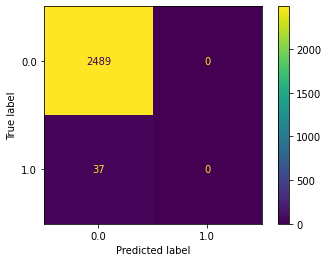

scores:  [0.98416887 0.98416887 0.98481848 0.98481848 0.98415842]


In [930]:
mod.fit(X_train, y_train)
plot_confusion_matrix(mod, X_test, y_test)  
plt.show()

scores = cross_val_score(mod, X_train, y_train, cv=5)
print('scores: ',scores)

In [1020]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

strategy = 0.8
rus = RandomUnderSampler(random_state=0,sampling_strategy=strategy)
ros = RandomOverSampler(sampling_strategy=strategy)
smote = SMOTE(sampling_strategy=strategy)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [1021]:
# y_train_rus.value_counts()
# y_train_ros.value_counts()
# y_train_smote.value_counts()

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


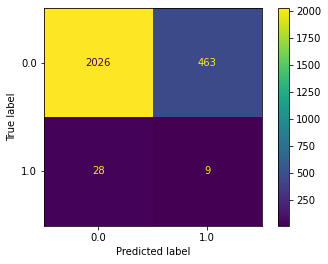

scores:  [0.62264151 0.58490566 0.47169811 0.52830189 0.49056604]


In [1022]:
mod.fit(X_train_rus, y_train_rus)
plot_confusion_matrix(mod, X_test, y_test)  
plt.show()

scores = cross_val_score(mod, X_train_rus, y_train_rus, cv=5)
print('scores: ',scores)

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


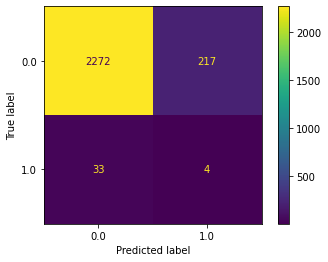

scores:  [0.65301564 0.64878957 0.65921788 0.67001862 0.63985102]


In [1023]:
mod.fit(X_train_ros, y_train_ros)
plot_confusion_matrix(mod, X_test, y_test)  
plt.show()

scores = cross_val_score(mod, X_train_ros, y_train_ros, cv=5)
print('scores: ',scores)

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


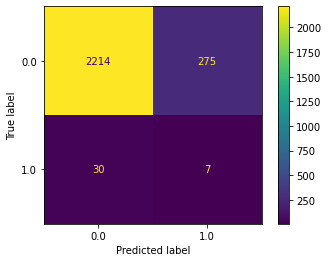

scores:  [0.67907669 0.67597765 0.68156425 0.6849162  0.67337058]


In [1024]:
mod.fit(X_train_smote, y_train_smote)
plot_confusion_matrix(mod, X_test, y_test)  
plt.show()

scores = cross_val_score(mod, X_train_smote, y_train_smote, cv=5)
print('scores: ',scores)

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


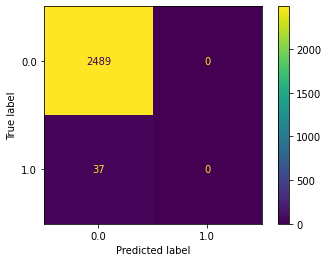

scores:  [0.9848285  0.9848285  0.98481848 0.98481848 0.98415842]


In [1025]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=5, criterion = 'entropy', n_jobs = -1)
model1 = forest.fit(X_train,y_train)
plot_confusion_matrix(model1, X_test, y_test)  
plt.show()

scores = cross_val_score(model1, X_train, y_train, cv=5)
print('scores: ',scores)

In [1026]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model, features, labels):
    pred = model.predict(features)
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    f1 = round(f1_score(labels,pred),3)
    roc = round(roc_auc_score(labels,pred),3)
    
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / F1:{} / ROC:{} '.format(name, accuracy, precision, recall,f1,roc))


In [1027]:
from imblearn.ensemble import BalancedBaggingClassifier
balbag = BalancedBaggingClassifier(base_estimator = forest, n_estimators = 500, bootstrap = False,  bootstrap_features= True,
                                  sampling_strategy = strategy, replacement = False, n_jobs = -1, random_state = 5)
model_full_sample = balbag.fit(X_train, y_train)

Forest -- Accuracy:0.837 / Precision:0.028 / Recall:0.297 / F1:0.051 / ROC:0.571 


/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


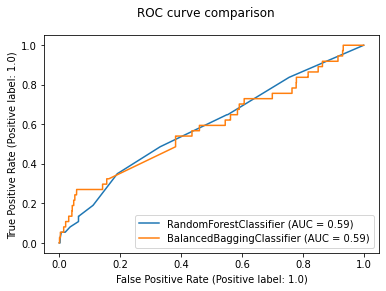

In [1028]:
evaluate_model('Forest', model_full_sample, X_test, y_test)
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt
rfc_single_disp = plot_roc_curve(model1, X_test, y_test)
rfc_disp = plot_roc_curve(model_full_sample, X_test, y_test, ax=rfc_single_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()

/Users/nellekesmits/Documents/projects/imbalanceddataset/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


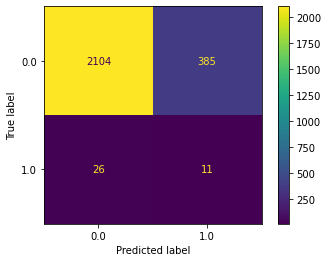

In [1029]:
plot_confusion_matrix(model_full_sample, X_test, y_test)  
plt.show()

In [503]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('scaler', StandardScaler()), 
#     ('svc', SVC())])

# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)

In [ ]:
## static data for interaction effect
# import game?
# specific players in the game?
# het team waar het om gaat scoort die makkelijker?
# 

In [ ]:
## what is an imbalanced dataset

In [ ]:
# oneclass 